In [223]:
import pandas as pd
import sqlite3

df = pd.read_csv("Sample_Superstore.csv", encoding="latin-1")

# df.info()

df.head()

# df.shape

# df.columns

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [183]:
print(df.columns.tolist())


['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [ ]:
df = pd.read_csv("Sample-Superstore-clean.csv", encoding="latin-1")

# Conectar a SQLite (esto crea el archivo superstore.db si no existe)
conn = sqlite3.connect("superstore.db")

# Guardar los datos en una tabla llamada "Superstore"
df.to_sql("Superstore", conn, if_exists="replace", index=False)



9994

# SPRINT 1 (Epic 2 and Epic 3)

### Epic 2: Design your first database

As a VS Group BI analyst, you've received a CSV document with all the sales data. You can download the file here.

Open the file and try to understand how the fields are related. We suggest using Pandas at this stage to inspect and prepare the data into CSV files which will become the database tables. Note that this approach would not be possible with very large datasets. In these cases you would only take a sample of the data to get a feel for the structure and content (e.g. 100K rows).

In order to split the file into tables, we need to have a grasp on database design. This article offers handy tips to design your first database: Database design basics. Be aware that database design principles are mastered over years through real-world experience. It is also important to note that this is an iterative process - you are not likely to create the perfect design in your first attempt!

Write down your table schemas, remembering to carefully select your primary and, if necessary, foreign keys for each table. You can use a program like DBDiagram.io to help you visualize your tables' shapes and relations.

Once you have an initial design for your ERD:

Can you explain why dividing the information into several tables is preferable to keeping it in a single table?
How would you manage tables with unique rows such as customers, products, etc.?
Is there any need to engineer new columns in any of the tables that are not available in the Sample-Superstore.csv (e.g. Supplier price)?
Pick your RDBMS

You can decide which RDBMS you prefer to use: SQLite, MySQL, or PostgreSQL.

SQLite
MySQL
PostgreSQL
There will be differences, but the basic steps remain the same regardless of which RDBMS you use. We will continue to use SQLite for the examples in the LMS.

Please use the documentation of the RDBMS or Google for a solution if you choose an alternative to SQLite.

You will frequently find yourself in a situation where you're new to a program or performing a task you've never done before. Therefore, it is important to be self-reliant and be able to read the program's documentation or find a solution online. Sometimes, despite following every step as it is written in a well-written tutorial, the code will still not work. In this instance, look through several sources, and perform trial and error until you figure it out.

If you are using SQLite, you can start with these two resources:

sqlite3 tutorial (official Python documentation)
SQLite using Python (Geeks for Geeks)

### Epic 3: Loading your database into an RDBMS

Once you have decided on the tables and relationships, and which RDBMS you will use, you will need to consider how you will create and populate your database. Task 9 of the previous project had you import a .csv file into an SQLite table using DB Browser, this could be one way you achieve this objective.

Another approach would be to use the Python module sqlite3, which comes pre-installed with Python. Give the path to your database file to create a connection (if the database file doesn't exist yet, it will be created automatically). Create a cursor for that connection which can then be used to execute SQL queries. 

Once your database has been created, you will need to start separating the large .csv into smaller DataFrames. Make sure you're cleaning your data as you go:

- check for duplicates
- rename columns
- format values such as dates
- create additional features you may require for your database

Once you have a DataFrame that represents the values for a single table, you can think about how you will populate your database.

The simplest option is to utilize the .to_sql() DataFrame method from Pandas. There are quite a few arguments to customize the functionality of this method, have a look at the documentation to make sure you are actually achieving the result you intend. 

Alternatively, you could write the INSERT queries manually, and use execute() or executemany() as demonstrated in the sqlite tutorial linked above. If you follow this path, make sure to read the section in their documentation on using placeholders as a practice against the risk of SQL injection attacks, and that you remember to conn.commit() the changes.

## Customer

In [234]:
conn = sqlite3.connect("shop.db")
cur = conn.cursor()

customer_table = """
   CREATE TABLE IF NOT EXISTS customer (
      customer_id  TEXT PRIMARY KEY,
      customername TEXT NOT NULL,
      segment      TEXT
   )
"""
cur.execute(customer_table)

cur.close()
conn.close()

In [235]:
df = pd.read_csv("Sample_Superstore.csv", encoding="latin-1")

customer_table = df[["Customer ID", "Customer Name", "Segment"]].copy()
customer_table.rename(columns={"Customer ID": "customer_id", "Customer Name": "customername", "Segment": "segment"}, inplace=True)
customer_table.drop_duplicates(subset=["customer_id"], inplace=True)

customer_table.to_csv("customer.csv", index=False)

In [236]:
conn = sqlite3.connect("shop.db")

customer_table.to_sql(
   "customer", # the name of the table
   con=conn, # the connection variable
   index=False, # whether to include the index column
   if_exists="append" # define behavior if table already exists
)
conn.close()

In [237]:
df_customer = pd.read_csv("customer.csv", encoding="latin-1")

df_customer.info

<bound method DataFrame.info of     customer_id       customername      segment
0      CG-12520        Claire Gute     Consumer
1      DV-13045    Darrin Van Huff    Corporate
2      SO-20335     Sean O'Donnell     Consumer
3      BH-11710    Brosina Hoffman     Consumer
4      AA-10480       Andrew Allen     Consumer
..          ...                ...          ...
788    CJ-11875       Carl Jackson    Corporate
789    RS-19870         Roy Skaria  Home Office
790    SC-20845         Sung Chung     Consumer
791    RE-19405    Ricardo Emerson     Consumer
792    SM-20905  Susan MacKendrick     Consumer

[793 rows x 3 columns]>

## Orders

In [231]:
conn = sqlite3.connect("shop.db")
cur = conn.cursor()

cur.execute("PRAGMA foreign_keys = ON;")

orders_table = """
CREATE TABLE IF NOT EXISTS orders (
  order_id     TEXT    PRIMARY KEY,
  address_id   INTEGER NOT NULL,
  customer_id  TEXT    NOT NULL,
  order_date   TEXT,
  ship_mode    TEXT,
  ship_date    TEXT,
  FOREIGN KEY (address_id)  REFERENCES address(address_id),
  FOREIGN KEY (customer_id) REFERENCES customer(customer_id)
);
"""

cur.execute(orders_table) 
conn.commit()
cur.close()
conn.close()


In [232]:
df = pd.read_csv("Sample_Superstore.csv", encoding="latin-1")

orders_table = df[["Order ID", "Customer ID", "Order Date", "Ship Mode", "Ship Date"]].copy()

orders_table.drop_duplicates(subset=["Order ID"], inplace=True)

orders_table["address_id"] = range(1, len(orders_table) + 1)

orders_table.rename(columns={
    "Order ID": "order_id",
    "Customer ID": "customer_id",
    "Order Date": "order_date",
    "Ship Mode": "ship_mode",
    "Ship Date": "ship_date"
}, inplace=True)

orders_table.to_csv("orders.csv", index=False)


In [233]:
# Populate

conn = sqlite3.connect("shop.db")

orders_table.to_sql(
   "orders", # the name of the table
   con=conn, # the connection variable
   index=False, # whether to include the index column
   if_exists="append" # define behavior if table already exists
)
conn.close()

## Address

In [238]:
conn = sqlite3.connect("shop.db")
cur = conn.cursor()

cur.execute("PRAGMA foreign_keys = ON;")

address_table = """
CREATE TABLE IF NOT EXISTS address (
  address_id  INTEGER PRIMARY KEY,
  customer_id TEXT NOT NULL,
  country     TEXT,
  city        TEXT,
  postalcode  TEXT,      
  region      TEXT,
  state       TEXT,
  FOREIGN KEY (customer_id) REFERENCES customer(customer_id)
);
"""

cur.execute(address_table)
conn.commit()
cur.close()
conn.close()


In [239]:
df = pd.read_csv("Sample_Superstore.csv", encoding="latin-1")

df["address_id"] = range(1, len(df) + 1)

address_table = df[["address_id", "Customer ID", "Country", "City", "Postal Code", "Region", "State"]].copy()
address_table.rename(columns={"Customer ID": "customer_id", "Country": "country", "City": "city", "Postal Code": "postalcode", "Region": "region", "State": "state"}, inplace=True)
address_table = address_table.drop_duplicates(
    subset=["country", "city", "postalcode", "region", "state"]
)

address_table.to_csv("address.csv", index=False)

In [240]:
conn = sqlite3.connect("shop.db")

address_table.to_sql(
   "address", # the name of the table
   con=conn, # the connection variable
   index=False, # whether to include the index column
   if_exists="append" # define behavior if table already exists
)
conn.close()

## Product

In [241]:
conn = sqlite3.connect("shop.db")
cur = conn.cursor()

cur.execute("PRAGMA foreign_keys = ON;")

product_table = """
CREATE TABLE IF NOT EXISTS product (
  product_id   TEXT PRIMARY KEY, 
  productname  TEXT,
  category     TEXT,
  subcategory  TEXT
);
"""
cur.execute(product_table)

conn.commit()
cur.close()
conn.close()


In [242]:
df = pd.read_csv("Sample_Superstore.csv", encoding="latin-1")

product_table = df[["Product ID", "Product Name", "Category", "Sub-Category"]].copy()
product_table.rename(columns={"Product ID": "product_id", "Product Name": "productname", "Category": "category", "Sub-Category": "subcategory"}, inplace=True)
product_table = product_table.drop_duplicates(subset=["product_id"], keep="first")

product_table.to_csv("product.csv", index=False)

In [243]:
conn = sqlite3.connect("shop.db")

product_table.to_sql(
   "product", # the name of the table
   con=conn, # the connection variable
   index=False, # whether to include the index column
   if_exists="append" # define behavior if table already exists
)
conn.close()

## Sales

In [246]:
import sqlite3 

conn = sqlite3.connect("shop.db")
cur = conn.cursor()

sales_table = """
CREATE TABLE IF NOT EXISTS sales (
  sale_id      INTEGER PRIMARY KEY,
  order_id     TEXT    NOT NULL,
  product_id   TEXT    NOT NULL,
  sales_amount REAL,
  quantity     INTEGER,
  discount     REAL,
  profit       REAL,
  FOREIGN KEY (order_id)  REFERENCES orders(order_id),
  FOREIGN KEY (product_id) REFERENCES product(product_id)
);
"""
cur.execute(sales_table)
conn.commit() 
cur.close()
conn.close()



In [247]:
df = pd.read_csv("Sample_Superstore.csv", encoding="latin-1")

sales_table = df[["Order ID", "Product ID", "Sales", "Quantity", "Discount", "Profit"]].copy()
sales_table.rename(columns={"Order ID": "order_id", "Product ID": "product_id", "Sales": "sales_amount", "Quantity": "quantity", "Discount": "discount", "Profit": "profit"}, inplace=True)
sales_table.drop_duplicates(inplace=True)

sales_table.to_csv("sales.csv", index=False)

In [248]:
conn = sqlite3.connect("shop.db")

sales_table.to_sql(
   "sales", # the name of the table
   con=conn, # the connection variable
   index=False, # whether to include the index column
   if_exists="append" # define behavior if table already exists
)
conn.close()

# SPRINT 2: Epic 1 - Exploratory Data Analysis

There are plenty of insights you can deduce from this dataset. As a starting point, here are some ideas which you could present to the team:

- What customer purchasing patterns can you discover? Such as activity on different days of the week, or weekly, monthly, quarterly, yearly, etc.
- Are there specific days/months/quarters when the sales have been unusually high/low, and what could be the possible reasons? How about the profit and loss margin?
- Which States and which customers made the highest number of orders? Are they the same as the highest spenders?
- Can you make a map showing the 5 States generating the most and least sales revenue?
- Can we see any patterns in the quarterly revenue behavior?
- Can you create a plot showing the growth rate of new customers over the months?
- What do you think about the customers? Are they individuals or wholesalers? Why would you say so?
- Are there any issues with the dataset?



## Top Categories

In [250]:
conn = sqlite3.connect("shop.db")
cur  = conn.cursor()

sql_all_categories = """
SELECT 
    p.category,
    SUM(s.sales_amount) AS total_sales
FROM sales s
JOIN product p ON s.product_id = p.product_id
GROUP BY p.category
ORDER BY total_sales DESC;
"""

cur.execute(sql_all_categories)
rows = cur.fetchall()

# Only two columns here:
all_categories_df = pd.DataFrame(rows, columns=["category", "total_sales"])
print(all_categories_df)

cur.close()
conn.close()

          category  total_sales
0       Technology  836154.0330
1        Furniture  741718.4233
2  Office Supplies  719047.0320


In [251]:
conn = sqlite3.connect("shop.db")
cur  = conn.cursor()

sql_loss_categories = """
SELECT p.category,
       SUM(s.profit) AS total_profit
FROM sales s
JOIN product p
  ON p.product_id = s.product_id
GROUP BY p.category
HAVING total_profit < 0;
"""

cur.execute(sql_loss_categories)
rows = cur.fetchall()
loss_categories_df = pd.DataFrame(rows, columns=["category", "total_profit"])
print("Categories with losses:")
print(loss_categories_df)

cur.close()
conn.close()


Categories with losses:
Empty DataFrame
Columns: [category, total_profit]
Index: []


In [252]:
conn = sqlite3.connect("shop.db")
cur  = conn.cursor()

sql_categories = """
SELECT
  p.category,
  SUM(s.profit) AS total_profit
FROM sales s
JOIN product p ON p.product_id = s.product_id
GROUP BY p.category
ORDER BY total_profit ASC
"""
cur.execute(sql_categories)
rows = cur.fetchall()

sql_categories_df = pd.DataFrame(rows, columns=["category", "total_profit"])
print("sql_categories:")
print(sql_categories_df)

cur.close()
conn.close()

sql_categories:
          category  total_profit
0        Furniture    18463.3316
1  Office Supplies   122490.8008
2       Technology   145454.9481


In [253]:
conn = sqlite3.connect("shop.db")
cur  = conn.cursor()

sql_loss_subcategories = """
SELECT p.category,
       p.subcategory,
       SUM(s.profit) AS total_profit
FROM sales s
JOIN product p
  ON p.product_id = s.product_id
GROUP BY p.category, p.subcategory
HAVING total_profit < 0;
"""

cur.execute(sql_loss_subcategories)
rows = cur.fetchall()
loss_subcategories_df = pd.DataFrame(rows, columns=["category", "subcategory", "total_profit"])
print("Subcategories with losses:")
print(loss_subcategories_df)

cur.close()
conn.close()


Subcategories with losses:
          category subcategory  total_profit
0        Furniture   Bookcases    -3472.5560
1        Furniture      Tables   -17725.4811
2  Office Supplies    Supplies    -1189.0995


## 5 states maximum and minimum revenue

In [254]:
conn = sqlite3.connect("shop.db")

sql_top5_states = """
SELECT 
    a.state,
    SUM(s.sales_amount)  AS total_sales,
    SUM(s.profit) AS total_profit
FROM sales   s
JOIN orders  o ON o.order_id   = s.order_id
JOIN address a ON a.customer_id = o.customer_id
WHERE a.state IS NOT NULL AND a.state <> ''
GROUP BY a.state
ORDER BY total_sales DESC
LIMIT 5;
"""

top5_states_df = pd.read_sql_query(sql_top5_states, conn)
print("Top 5 states by sales:")
print(top5_states_df)

conn.close()

Top 5 states by sales:
        state  total_sales  total_profit
0  California  315605.6832    47000.7112
1       Texas  158574.0370     9970.5265
2     Florida  125937.8810     9172.0281
3    Illinois  113503.2325    12612.3119
4        Ohio   78327.8850     7064.6194


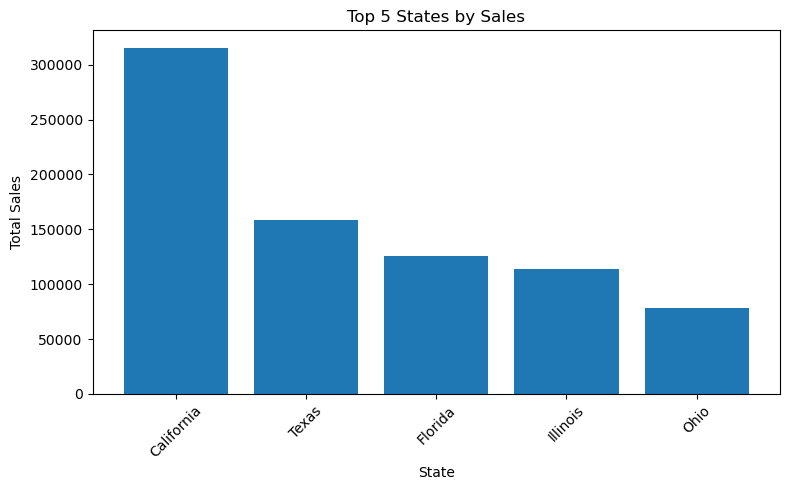

In [255]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_states_df["state"], top5_states_df["total_sales"])
plt.title("Top 5 States by Sales")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [256]:
conn = sqlite3.connect("shop.db")
cur  = conn.cursor()

# Bottom 5 states by sales (also shows profit)
sql_bottom5_states = """
SELECT a.state,
       SUM(s.sales_amount)  AS total_sales,
       SUM(s.profit) AS total_profit
FROM sales   s
JOIN orders  o ON o.order_id   = s.order_id
JOIN address a ON a.customer_id = o.customer_id
GROUP BY a.state
ORDER BY total_sales ASC
LIMIT 5;
"""
cur.execute(sql_bottom5_states)
rows = cur.fetchall()

bottom5_states_df = pd.DataFrame(rows, columns=["state", "total_sales", "total_profit"])
print("Bottom 5 states by sales:")
print(bottom5_states_df)

cur.close()
conn.close()

Bottom 5 states by sales:
           state  total_sales  total_profit
0        Wyoming     2453.284      280.7822
1   North Dakota     2461.404      580.3075
2  West Virginia     3082.653       96.2702
3        Vermont     6108.338     1203.6768
4       Nebraska     7174.848     1565.5789


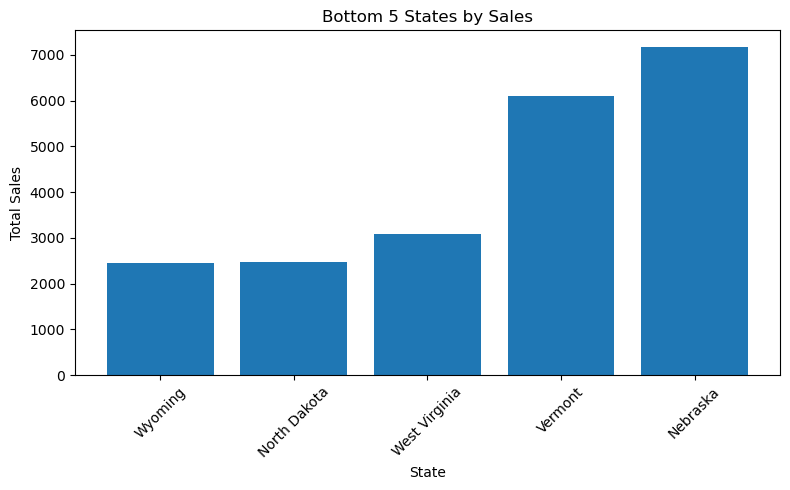

In [257]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(bottom5_states_df["state"], bottom5_states_df["total_sales"])
plt.title("Bottom 5 States by Sales")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


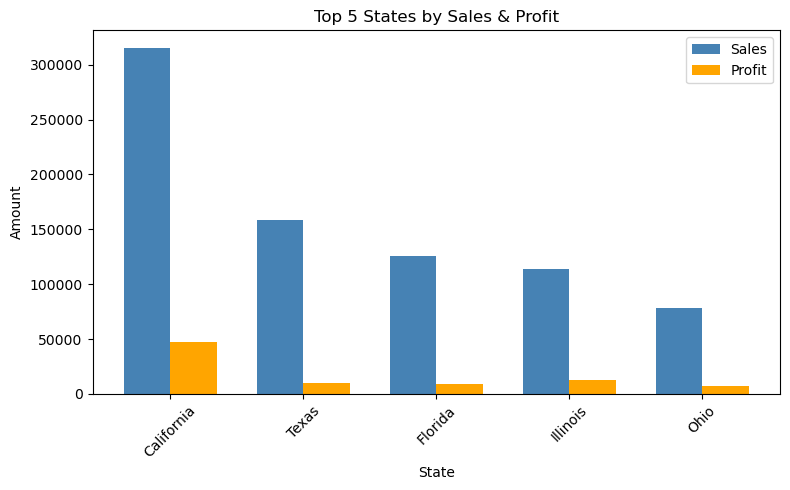

In [258]:
import numpy as np

x = np.arange(len(top5_states_df["state"]))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width/2, top5_states_df["total_sales"], width, label="Sales", color="steelblue")
ax.bar(x + width/2, top5_states_df["total_profit"], width, label="Profit", color="orange")

ax.set_title("Top 5 States by Sales & Profit")
ax.set_xlabel("State")
ax.set_ylabel("Amount")
ax.set_xticks(x)
ax.set_xticklabels(top5_states_df["state"], rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


## Top products per segment by SALES

In [259]:
conn = sqlite3.connect("shop.db")
sql_segment = """
SELECT
  c.segment,
  p.productname,
  SUM(s.sales_amount)  AS total_sales,
  SUM(s.profit)        AS total_profit
FROM sales s
JOIN product  p ON p.product_id = s.product_id
JOIN orders   o ON o.order_id = s.order_id
JOIN customer c ON c.customer_id = o.customer_id
GROUP BY c.segment, p.productname;
"""
df_segment = pd.read_sql_query(sql_segment, conn)
conn.close()

# Top 3 products per segment by SALES
top3 = (
    df_segment
      .sort_values(["segment","total_sales"], ascending=[True, False])
      .groupby("segment", as_index=False, group_keys=False)
      .head(3)
)

print(top3[["segment","productname","total_sales"]])



          segment                                        productname  \
368      Consumer              Canon imageCLASS 2200 Advanced Copier   
720      Consumer  HP Designjet T520 Inkjet Large Format Printer ...   
719      Consumer       HON 5400 Series Task Chairs for Big and Tall   
1980    Corporate              Canon imageCLASS 2200 Advanced Copier   
1694    Corporate   3D Systems Cube Printer, 2nd Generation, Magenta   
2498    Corporate  Martin Yale Chadless Opener Electric Letter Op...   
3364  Home Office  Cisco TelePresence System EX90 Videoconferenci...   
3340  Home Office              Canon imageCLASS 2200 Advanced Copier   
3574  Home Office               Hewlett Packard LaserJet 3310 Copier   

      total_sales  
368     32899.906  
720     18374.895  
719     17384.304  
1980    17499.950  
1694    14299.890  
2498     8328.100  
3364    22638.480  
3340    11199.968  
3574     9239.846  


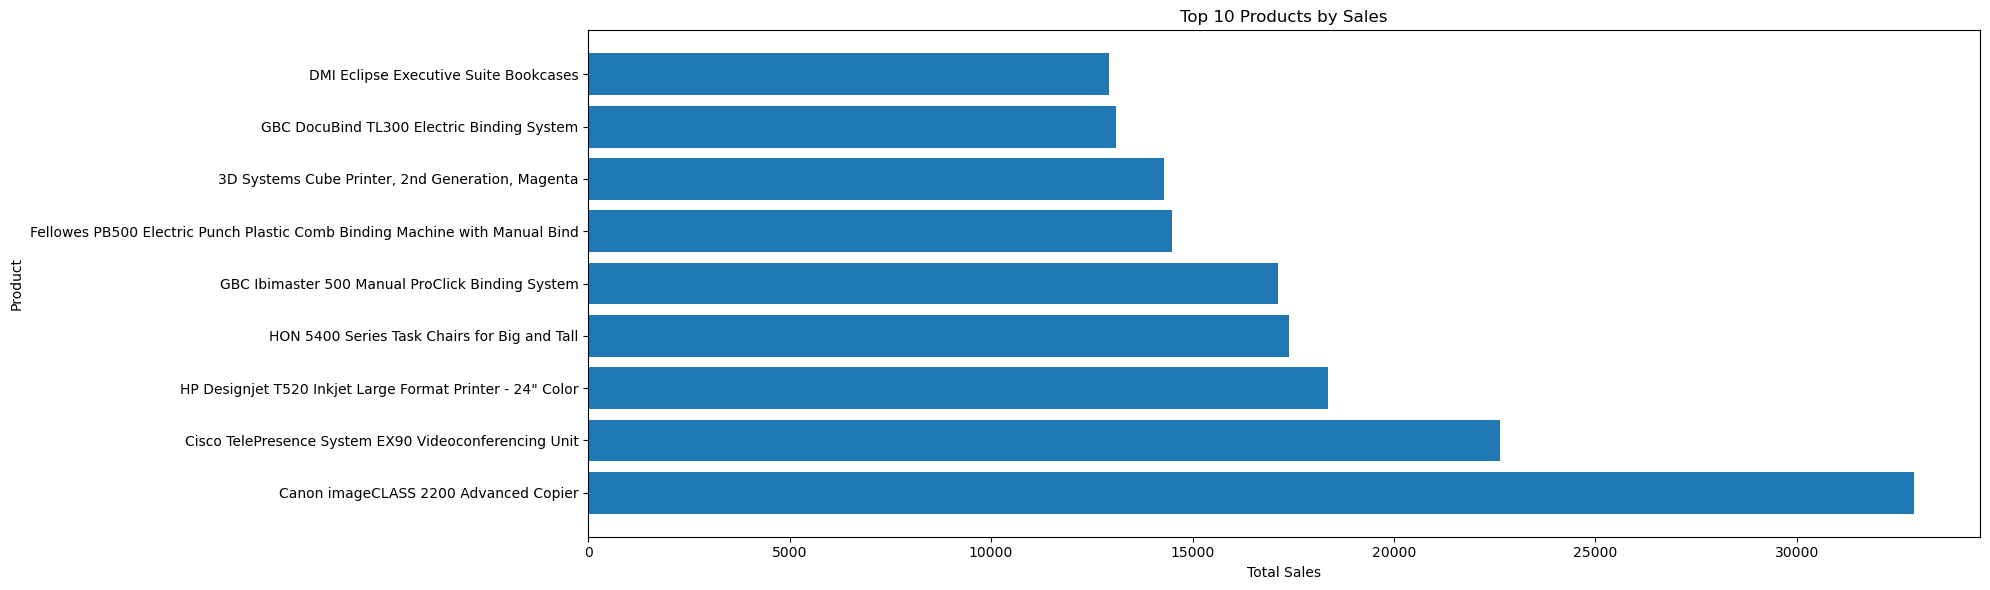

In [260]:
top10 = df_segment.sort_values("total_sales", ascending=False).head(10)

plt.figure(figsize=(20,6))
plt.barh(top10["productname"], top10["total_sales"])
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


In [218]:
import pandas as pd

# Load orders only
df_orders = pd.read_csv("orders.csv")

# Build a FEATURED copy (doesn't touch df or the original df_orders)
df_orders_feat = df_orders.copy()

# Parse ship_date (your format looks like M/D/YYYY)
df_orders_feat["ship_date"] = pd.to_datetime(df_orders_feat["ship_date"], errors="coerce")

# Time features from ship_date
df_orders_feat["Ship_Year"]      = df_orders_feat["ship_date"].dt.year
df_orders_feat["Ship_Month"]     = df_orders_feat["ship_date"].dt.month
df_orders_feat["Ship_Quarter"]   = df_orders_feat["ship_date"].dt.quarter
df_orders_feat["Ship_DayOfWeek"] = df_orders_feat["ship_date"].dt.day_name()
df_orders_feat["Ship_YearMonth"] = df_orders_feat["ship_date"].dt.to_period("M")

# Preview
print(
    df_orders_feat[
        ["ship_date","Ship_Year","Ship_Month","Ship_Quarter","Ship_DayOfWeek","Ship_YearMonth"]
    ].head()
)

# (Optional) quick aggregates using only orders data (no sales join):
# Shipments per year (count of orders shipped each year)
shipments_per_year = (
    df_orders_feat.groupby("Ship_Year", dropna=True)
    .size()
    .reset_index(name="num_shipments")
    .sort_values("Ship_Year")
)
print(shipments_per_year)

   ship_date  Ship_Year  Ship_Month  Ship_Quarter Ship_DayOfWeek  \
0 2016-11-11       2016          11             4         Friday   
1 2016-06-16       2016           6             2       Thursday   
2 2015-10-18       2015          10             4         Sunday   
3 2014-06-14       2014           6             2       Saturday   
4 2017-04-20       2017           4             2       Thursday   

  Ship_YearMonth  
0        2016-11  
1        2016-06  
2        2015-10  
3        2014-06  
4        2017-04  
   Ship_Year  num_shipments
0       2014            944
1       2015           1052
2       2016           1305
3       2017           1688
4       2018             20


## Product shipped per Year

In [263]:
import sqlite3, pandas as pd

conn = sqlite3.connect("shop.db")
sql_productyear = """
SELECT
  CAST(SUBSTR(o.order_date, -4) AS INT) AS order_year,
  SUM(s.quantity) AS total_quantity
FROM sales s
JOIN orders o ON o.order_id = s.order_id
WHERE o.order_date IS NOT NULL
GROUP BY order_year
ORDER BY order_year;
"""
df_productyear = pd.read_sql_query(sql_productyear, conn)
conn.close()
print(df_productyear)


   order_year  total_quantity
0        2014            7579
1        2015            7979
2        2016            9837
3        2017           12476


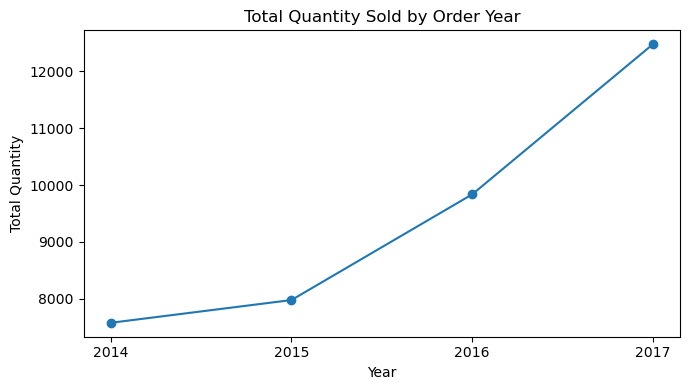

In [266]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator   

# Make sure the year is numeric and sorted
df_productyear["order_year"] = pd.to_numeric(df_productyear["order_year"], errors="coerce")
df_productyear = df_productyear.dropna(subset=["order_year"]).sort_values("order_year")

# ---------- Option A: Line chart ----------
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(df_productyear["order_year"], df_productyear["total_quantity"], marker="o")
ax.set_title("Total Quantity Sold by Order Year")
ax.set_xlabel("Year")
ax.set_ylabel("Total Quantity")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

## Sales per Year

In [214]:
import sqlite3, pandas as pd

conn = sqlite3.connect("shop.db")
sql_salesyear = """
SELECT
  CAST(SUBSTR(o.ship_date, -4) AS INT) AS ship_year,
  SUM(s.sales_amount) AS total_sales_amount
FROM sales s
JOIN orders o ON o.order_id = s.order_id
WHERE o.ship_date IS NOT NULL
GROUP BY ship_year
ORDER BY ship_year;
"""
df_salesyear = pd.read_sql_query(sql_salesyear, conn)
conn.close()
print(df_salesyear)

   ship_year  total_sales_amount
0       2014         470101.8211
1       2015         479442.5020
2       2016         611325.7530
3       2017         730889.7154
4       2018           5159.6968


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity